In [162]:
import requests
import alpha_vantage
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

In [184]:
key = 'Y6GDRF92F1KZUF4O'
api_url = 'https://www.alphavantage.co/query'

In [185]:
params = {
    'function': 'TIME_SERIES_DAILY',
    'symbol': 'GOOG',
    'outputsize': 'full',
    'apikey': key
}

In [186]:
response = requests.get(api_url, params=params)
response.json()

{'Meta Data': {'1. Information': 'Daily Prices (open, high, low, close) and Volumes',
  '2. Symbol': 'GOOG',
  '3. Last Refreshed': '2021-01-26',
  '4. Output Size': 'Full size',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2021-01-26': {'1. open': '1888.8400',
   '2. high': '1925.0000',
   '3. low': '1884.2450',
   '4. close': '1917.2400',
   '5. volume': '1257562'},
  '2021-01-25': {'1. open': '1920.6700',
   '2. high': '1929.5800',
   '3. low': '1867.5300',
   '4. close': '1899.4000',
   '5. volume': '1927320'},
  '2021-01-22': {'1. open': '1895.6800',
   '2. high': '1910.9500',
   '3. low': '1881.7600',
   '4. close': '1901.0500',
   '5. volume': '1272232'},
  '2021-01-21': {'1. open': '1898.0000',
   '2. high': '1934.8600',
   '3. low': '1887.1100',
   '4. close': '1891.2500',
   '5. volume': '2063932'},
  '2021-01-20': {'1. open': '1831.4600',
   '2. high': '1903.7100',
   '3. low': '1825.5300',
   '4. close': '1886.9000',
   '5. volume': '2490258'},
  '2021-01-19':

In [187]:
ts_dict = {'Fecha': [], 'Valor': []}

In [188]:
ts = response.json()['Time Series (Daily)']
for a in reversed(list(ts.keys())):
    ts_dict['Fecha'].append(datetime.strptime(a, '%Y-%m-%d'))
    ts_dict['Valor'].append(float(ts[a]['4. close']))

In [190]:
df_response = pd.DataFrame(ts_dict)

In [191]:
df_response

,Fecha,Valor
0,2014-03-27,558.46
1,2014-03-28,559.99
2,2014-03-31,556.97
3,2014-04-01,567.16
4,2014-04-02,567.00
...,...,...
1716,2021-01-20,1886.90
1717,2021-01-21,1891.25
1718,2021-01-22,1901.05
1719,2021-01-25,1899.40


<AxesSubplot:>

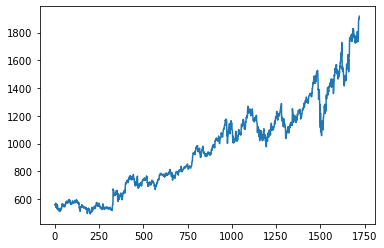

In [193]:
df_response['Valor'].plot()

In [160]:
len(df['Fecha'])

100

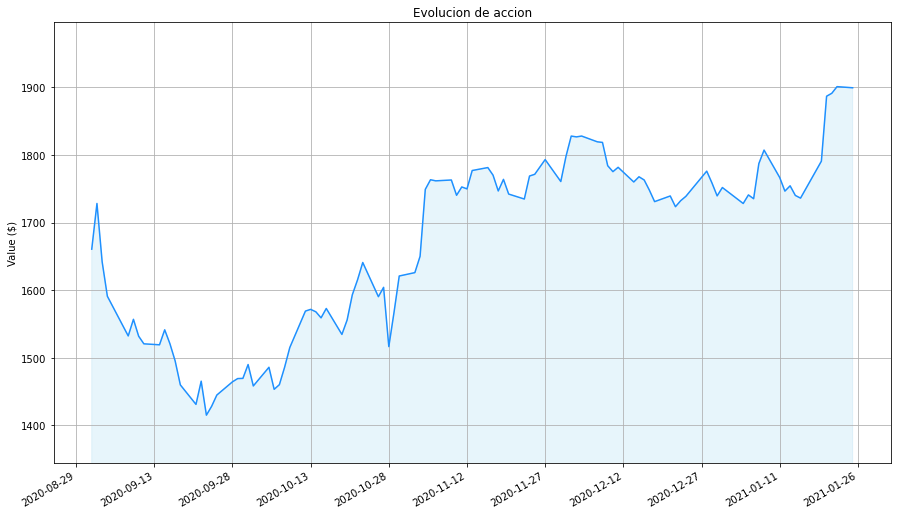

In [161]:
# Figure object, figure size
fig, ax = plt.subplots(figsize=(15,9))
ax.fill_between(df['Fecha'], df['Valor'],color="skyblue", alpha=0.2)
ax.plot(df['Fecha'], df['Valor'], color='dodgerblue')

# figure grids
ax.grid()

# y-axis limits
ax.set_ylim((min(df['Valor'])*0.95, max(df['Valor'])*1.05))

# axis titles
ax.set(ylabel='Value ($)', title='Evolucion de accion')
# dates interval
ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
# format x-axis
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')

plt.show()